#### Explore AI Academy: Regression Project


<div style="font-size: 35px">
    <font color='Green'> <b>CO2 Carbon Emissions Data Analysis</b></font> 

![agri_image.png](attachment:agri_image.png)

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview**](#chapter1)
    * [1.1 Introduction**](#section_1_1)
        * [1.1.1 Problem Statement**](#sub_section_1_1_1)
    * [1.2 Objectives**](#section_1_2)
* <b>[2. Importing Packages**](#chapter2)
* <b>[3. Loading Data**](#chapter3)
* <b>[4. Data Cleaning**](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)**](#chapter5)
* <b>[6. Feature Engineering**](#chapter6)</b>
* [7. Modeling](#chapter7)
* [8. Model Performance](#chapter8)
* <b>[9. Conclusion**](#chapter10)</b>
* [10. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

> <b> Objective of the Project:</b> To understand the impact of agricultural activities on climate change and develop strategies for sustainable practices.

> <b> Data Source:</b> The data was sourced from https://github.com/Edotsey/2401PTDS_Regression_Project. It covers a period of 30 years, from 1990 to 2020. The dataset was complied from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC).

> <b> Importance of the Study:</b> We have been tasked by a coalition of agricultural stakeholders to analyse and predict the effect of CO2 emissions on climate change. By the end of this project we should have thorough understanding of the impact on agricutural activities on climate change and CO2 emissions. 

> <b> Key Questions or Hypotheses:</b> What is the relationship between CO2 emissions in the agri-food sector and temperature increase? What impact does agricultural activities have on the changes in the climate and CO2 emissions?

> <b> Methodology Overview:</b> Provide a brieWhaf overview of the methods and techniques you plan to use in your analysis. This doesn’t need to be detailed here but should give a taste of the analytical approach and tools.

> <b> Structure of the Notebook:</b> For the data preparation, we will import the following packages: panda and numpy for the purpose of data manipulation and analysis. We intend to also import matplotlib and seaborn for data visualization, eg graphs and charts. For preprocessing, eg feature engineering, and modeling, sckit-learn and statsmodels will be used for statistics and testing the models.
.

> <b> Expected Outcomes:</b> If applicable, mention what kind of results or findings you anticipate. This could be specific insights, predictive model performance, or impact assessment.

**Click [here](https://trello.com/b/dUFgd9EX/my-trello-board) for the project board.**

**Click [here]() for project slides.**

- #### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

Emissions from the agri-food sector play a crucial role in climate change, as they represent a significant share of global annual emissions. We are investigating the relationship between CO2 emissions in the agri-food sector and temperature increase.

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction ....

## 2. Importing Packages <a class="anchor" id="chapter2"></a>



+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.
+ For regression and machine learning, `scikit-learn`
+ For statistics , `statsmodels`

In [1]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
path = os.getcwd()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, LinearRegression , Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.graphics.correlation import plot_corr

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the 2401PTDS_REGRESSION_PROJECT folder on github. To better manipulate and analyse the co2_emissions_from_agri.csv file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()`. We defined the dataset using the df function and will be used throughout the notebook.

In [2]:
# loading dataset
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head(10) 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.214190,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.214190,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.214190,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.214190,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.214190,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,0.0,90.1626,98.8680,7.7721,67.631366,863.0400,252.214190,15.9118,174.3647,275.2359,1779.3139,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,0.0,93.7905,21.6458,7.2221,67.631366,887.8772,252.214190,16.9535,165.4230,310.1306,1900.5873,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,0.0,93.9696,28.2132,7.4401,67.631366,905.8111,269.476476,18.1079,164.4681,338.9329,2110.6375,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,0.0,95.2597,30.8870,6.5105,67.631366,916.4552,318.548422,19.1808,163.5052,362.5683,2305.3943,541.6598,0.0,0.0,NaN,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,0.0,98.9876,39.4317,5.5415,67.631366,924.9281,306.779994,20.4208,163.5503,400.5558,2554.6904,611.0611,0.0,0.0,NaN,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500


To set the maximum number of columns to be displayed, the `pd.set_option()` function was put in place.

In [3]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [4]:
# The copy of the dataframe
df_copy = df.copy()

First look at the shape of the dataframe by using `.shape`.

In [5]:
# Displays the number of rows and columns
df_copy.shape

(6965, 31)

**Results** : The dataset consists of 6965 rows (observations) and 31 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [6]:
# Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

**Results** : The dataset consists of the following datatypes: 29 float64, 1 integer64 and 1 object.

### Dataset Attributes

- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
- Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,
 

CO2 is recorded in kilotonnes (kt): 1 kt represents 1000 kg of CO2.

The feature "Average Temperature C°", represents the average yearly temperature increase. For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.

Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink. Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere. Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.



## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

<div class="alert alert-block alert-info">
<b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div>

The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [7]:
def check_null_values(df_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df_copy:
        if df_copy[column].isnull().any():
            print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))

In [8]:
check_null_values(df_copy)

Savanna fires has 31 null values
Forest fires has 93 null values
Crop Residues has 1389 null values
Forestland has 493 null values
Net Forest conversion has 493 null values
Food Household Consumption has 473 null values
IPPU has 743 null values
Manure applied to Soils has 928 null values
Manure Management has 928 null values
Fires in humid tropical forests has 155 null values
On-farm energy use has 956 null values


**Results**:

The `count_duplicate_rows` function checks a DataFrame for duplicate entries by utilizing the duplicated method, which identifies duplicates, and then summarizes the total number of duplicate rows. This function is useful for data cleaning processes, ensuring uniqueness in datasets by returning the count of duplicate rows.

In [9]:
def count_duplicate_rows(df_copy):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count


In [10]:
count_duplicate_rows(df_copy)

0

**Results**: There are no duplicate rows in the dataset 

The `preprocess_data` function performs essential data cleaning operations on a DataFrame, setting missing values, filling in gaps with statistical measures (mean and median), and dropping non-essential columns. After processing, it prints the first two rows of the cleaned DataFrame for quick inspection and returns the entire modified DataFrame for further use.


In [11]:
def preprocess_data(df_copy):
    """
    Perform basic data cleaning on the DataFrame.

    This includes:
    - Setting missing 'Crop Residues' to 0.
    - Filling missing Forestland and Net Forest conversion with the mean and median, respectively.
    - Filling missing Savanna fires and Forest fires with the median and mean, respectively.
    - Dropping columns with many null values or that are not required.


    Returns:
        DataFrame: The cleaned DataFrame.
    """
    
    # Assign zero Crop Residues to data where the number of Crop Residues is missing
    df_copy['Crop Residues'] = df_copy['Crop Residues'].fillna(0)
    
    # Fill missing Forestland with the mean score
    df_copy['Forestland'] = df_copy['Forestland'].fillna(df_copy['Forestland'].mean())
    
    # Fill missing Net Forest conversion with the median number of Net Forest Conversions
    df_copy['Net Forest conversion'] = df_copy['Net Forest conversion'].fillna(df_copy['Net Forest conversion'].median())
    
    # Fill missing Forest fires scores with the median fires
    df_copy['Forest fires'] = df_copy['Forest fires'].fillna(df_copy['Forest fires'].median())
    

In [12]:
# look at the top 2
preprocess_data(df_copy.head(2))

#### <a href=#cont>Back to Table of Contents</a>

---

# 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.
 

#### Filter the DataFrame 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


In [14]:
# Identify outliers based on IQR in 'total_emission' column
Q1 = df['total_emission'].quantile(0.25)
Q3 = df['total_emission'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_price = (df['total_emission'] < lower_bound) | (df['total_emission'] > upper_bound)

# Print the number of outliers
print(f"Number of outliers in total_emission: {outliers_price.sum()}")

Number of outliers in total_emission: 1142


*Result*: There are a total of 1142 outliers in the total_emissions column. An outlier is a data point that differs significantly from other observations. An outlier may be due to a variability in the measurement, an indication of novel data, or it may be the result of experimental error; the latter are sometimes excluded from the data set.

In [15]:
# Remove rows with outliers
df = df[~outliers_price]

Calculate the number of each type of entry in the dataset, distinguishing between categories such as movies and TV shows to understand the overall composition and distribution.

In [16]:
# Get the count of entries per area in the dataset
Area_count = df_copy['Area'].value_counts()

# Display the top 5 most common Areas
Area_count.head()

Area
Afghanistan    31
Isle of Man    31
Montserrat     31
Morocco        31
Mozambique     31
Name: count, dtype: int64

5.1 Rural Population vs. Emissions Over Time

Exploring the relationship between rural populations and emissions over time is crucial for understanding the environmental impact of agricultural and rural activities.
 Rural areas are often associated with emissions from land-use practices, livestock, crop cultivation, and resource extraction, which can contribute significantly to greenhouse gas emissions. 

 By analyzing rural population trends alongside emission levels, our aim is to identify how changes in rural demographics might influence total emissions.

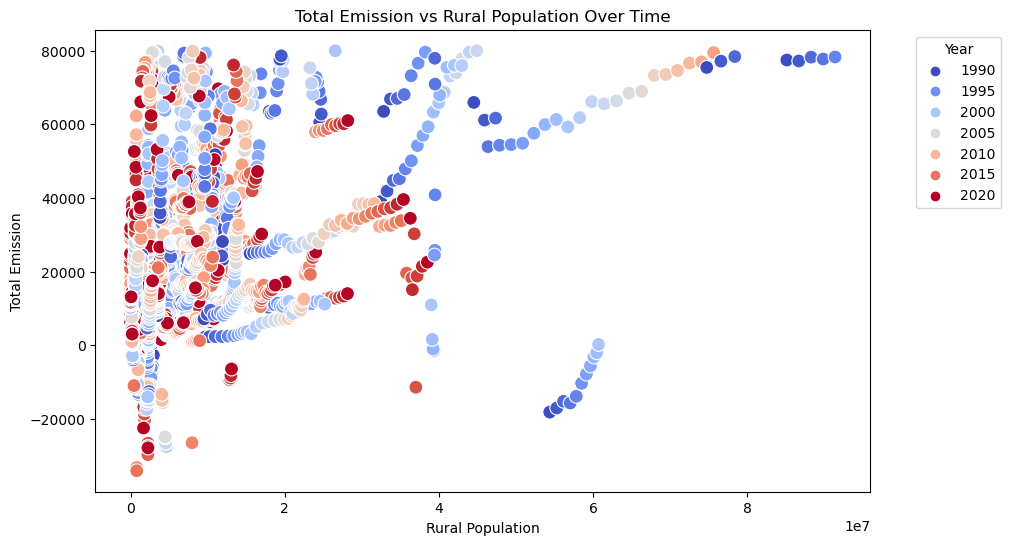

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rural population', y='total_emission', hue='Year', palette='coolwarm', s=100)
plt.title('Total Emission vs Rural Population Over Time')
plt.xlabel('Rural Population')
plt.ylabel('Total Emission')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()


5.2 Contributions of emission sources  over time

 Understanding the composition of emissions is vital for identifying the primary drivers of environmental impact. By breaking down total emissions into specific sources—such as savanna fires, forest fires, crop residues, and drained organic soils—this analysis aims to reveal which activities contribute most significantly to emissions over time. 

<Figure size 1400x800 with 0 Axes>

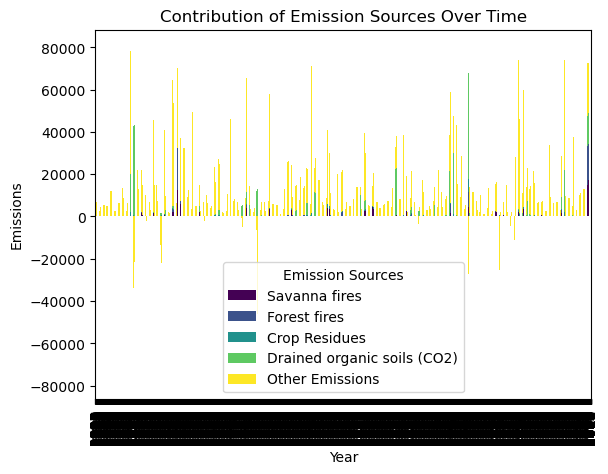

In [18]:
emissions_sources = ['Savanna fires', 'Forest fires', 'Crop Residues', 'Drained organic soils (CO2)']
df['Other Emissions'] = df['total_emission'] - df[emissions_sources].sum(axis=1)

plt.figure(figsize=(14, 8))
df.set_index('Year')[emissions_sources + ['Other Emissions']].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Contribution of Emission Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend(title='Emission Sources')
plt.show()


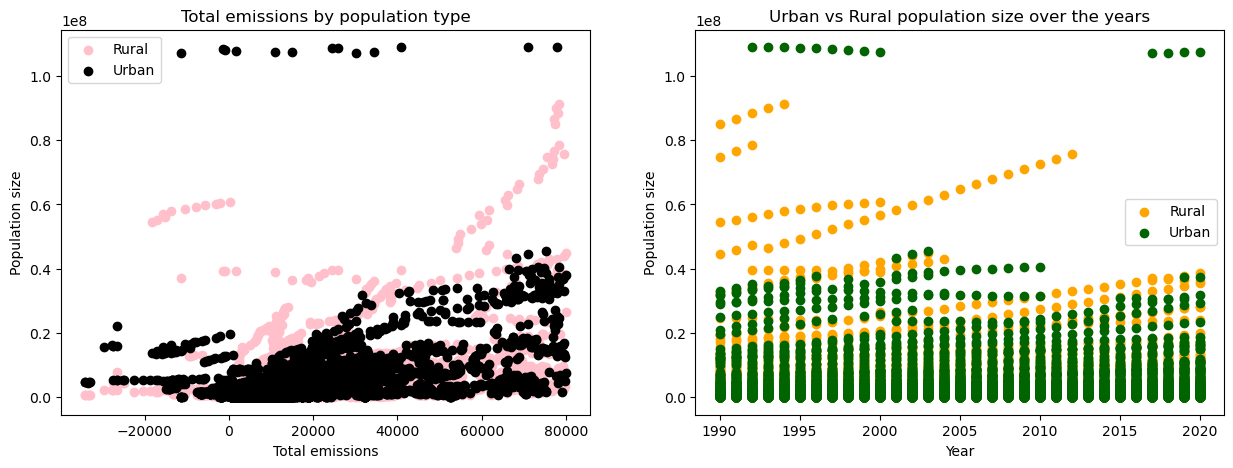

In [19]:
fig , axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df.total_emission, df['Rural population'], color = 'pink', label = "Rural")
axs[0].scatter(df.total_emission, df['Urban population'], color = "black" ,label = "Urban")
axs[0].legend()
axs[0].set_ylabel('Population size')
axs[0].set_xlabel('Total emissions')
axs[0].set_title('Total emissions by population type')


axs[1].scatter(df.Year, df['Rural population'], color = 'orange', label = "Rural")
axs[1].scatter(df.Year, df['Urban population'], color = "darkgreen" ,label = "Urban")
axs[1].legend()
axs[1].set_ylabel('Population size')
axs[1].set_xlabel('Year')
axs[1].set_title('Urban vs Rural population size over the years')

fig.show()

# 6. Feature Engineering 

In [21]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]

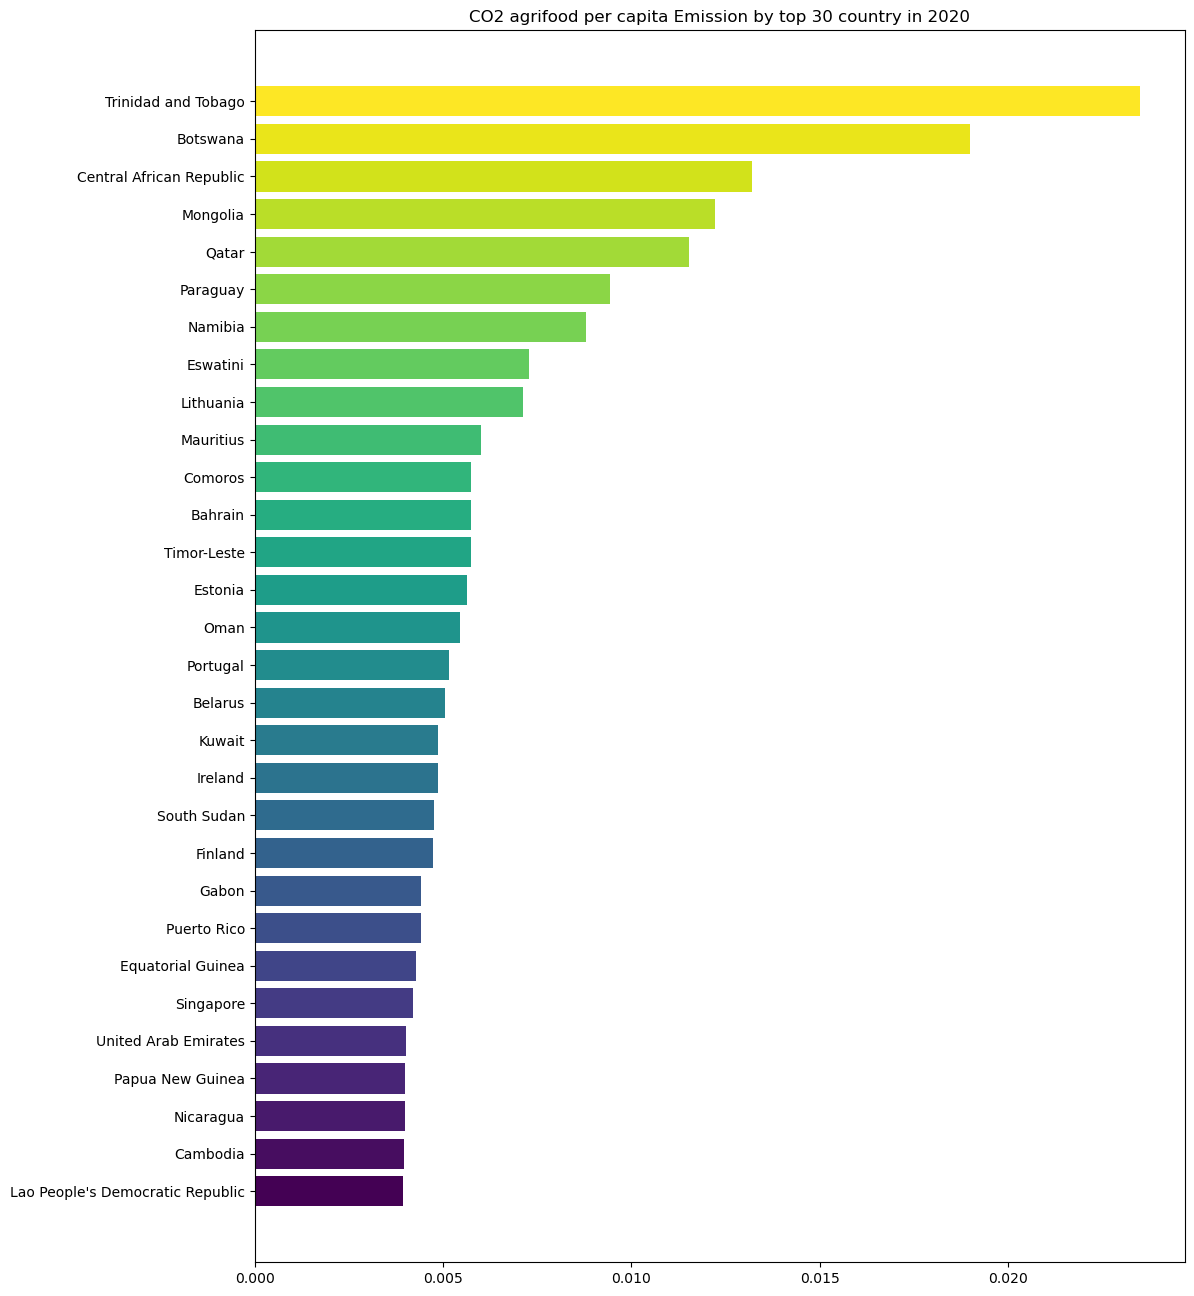

In [22]:
df["per_capita_emission_kt"] = df["total_emission"] / df["pop_tot"] 

def percapita_emission(df,year, length = 30):
        df = df.copy()
        # let's remove small island or counties ehit this filter
        plot = df.loc[(df["Year"]==year) & (df["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = plt.cm.get_cmap('viridis', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'], 
                plot['per_capita_emission_kt'], 
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.show()

percapita_emission(df, year=2020, length=30)

##### 6.2 Checking for Linearity 

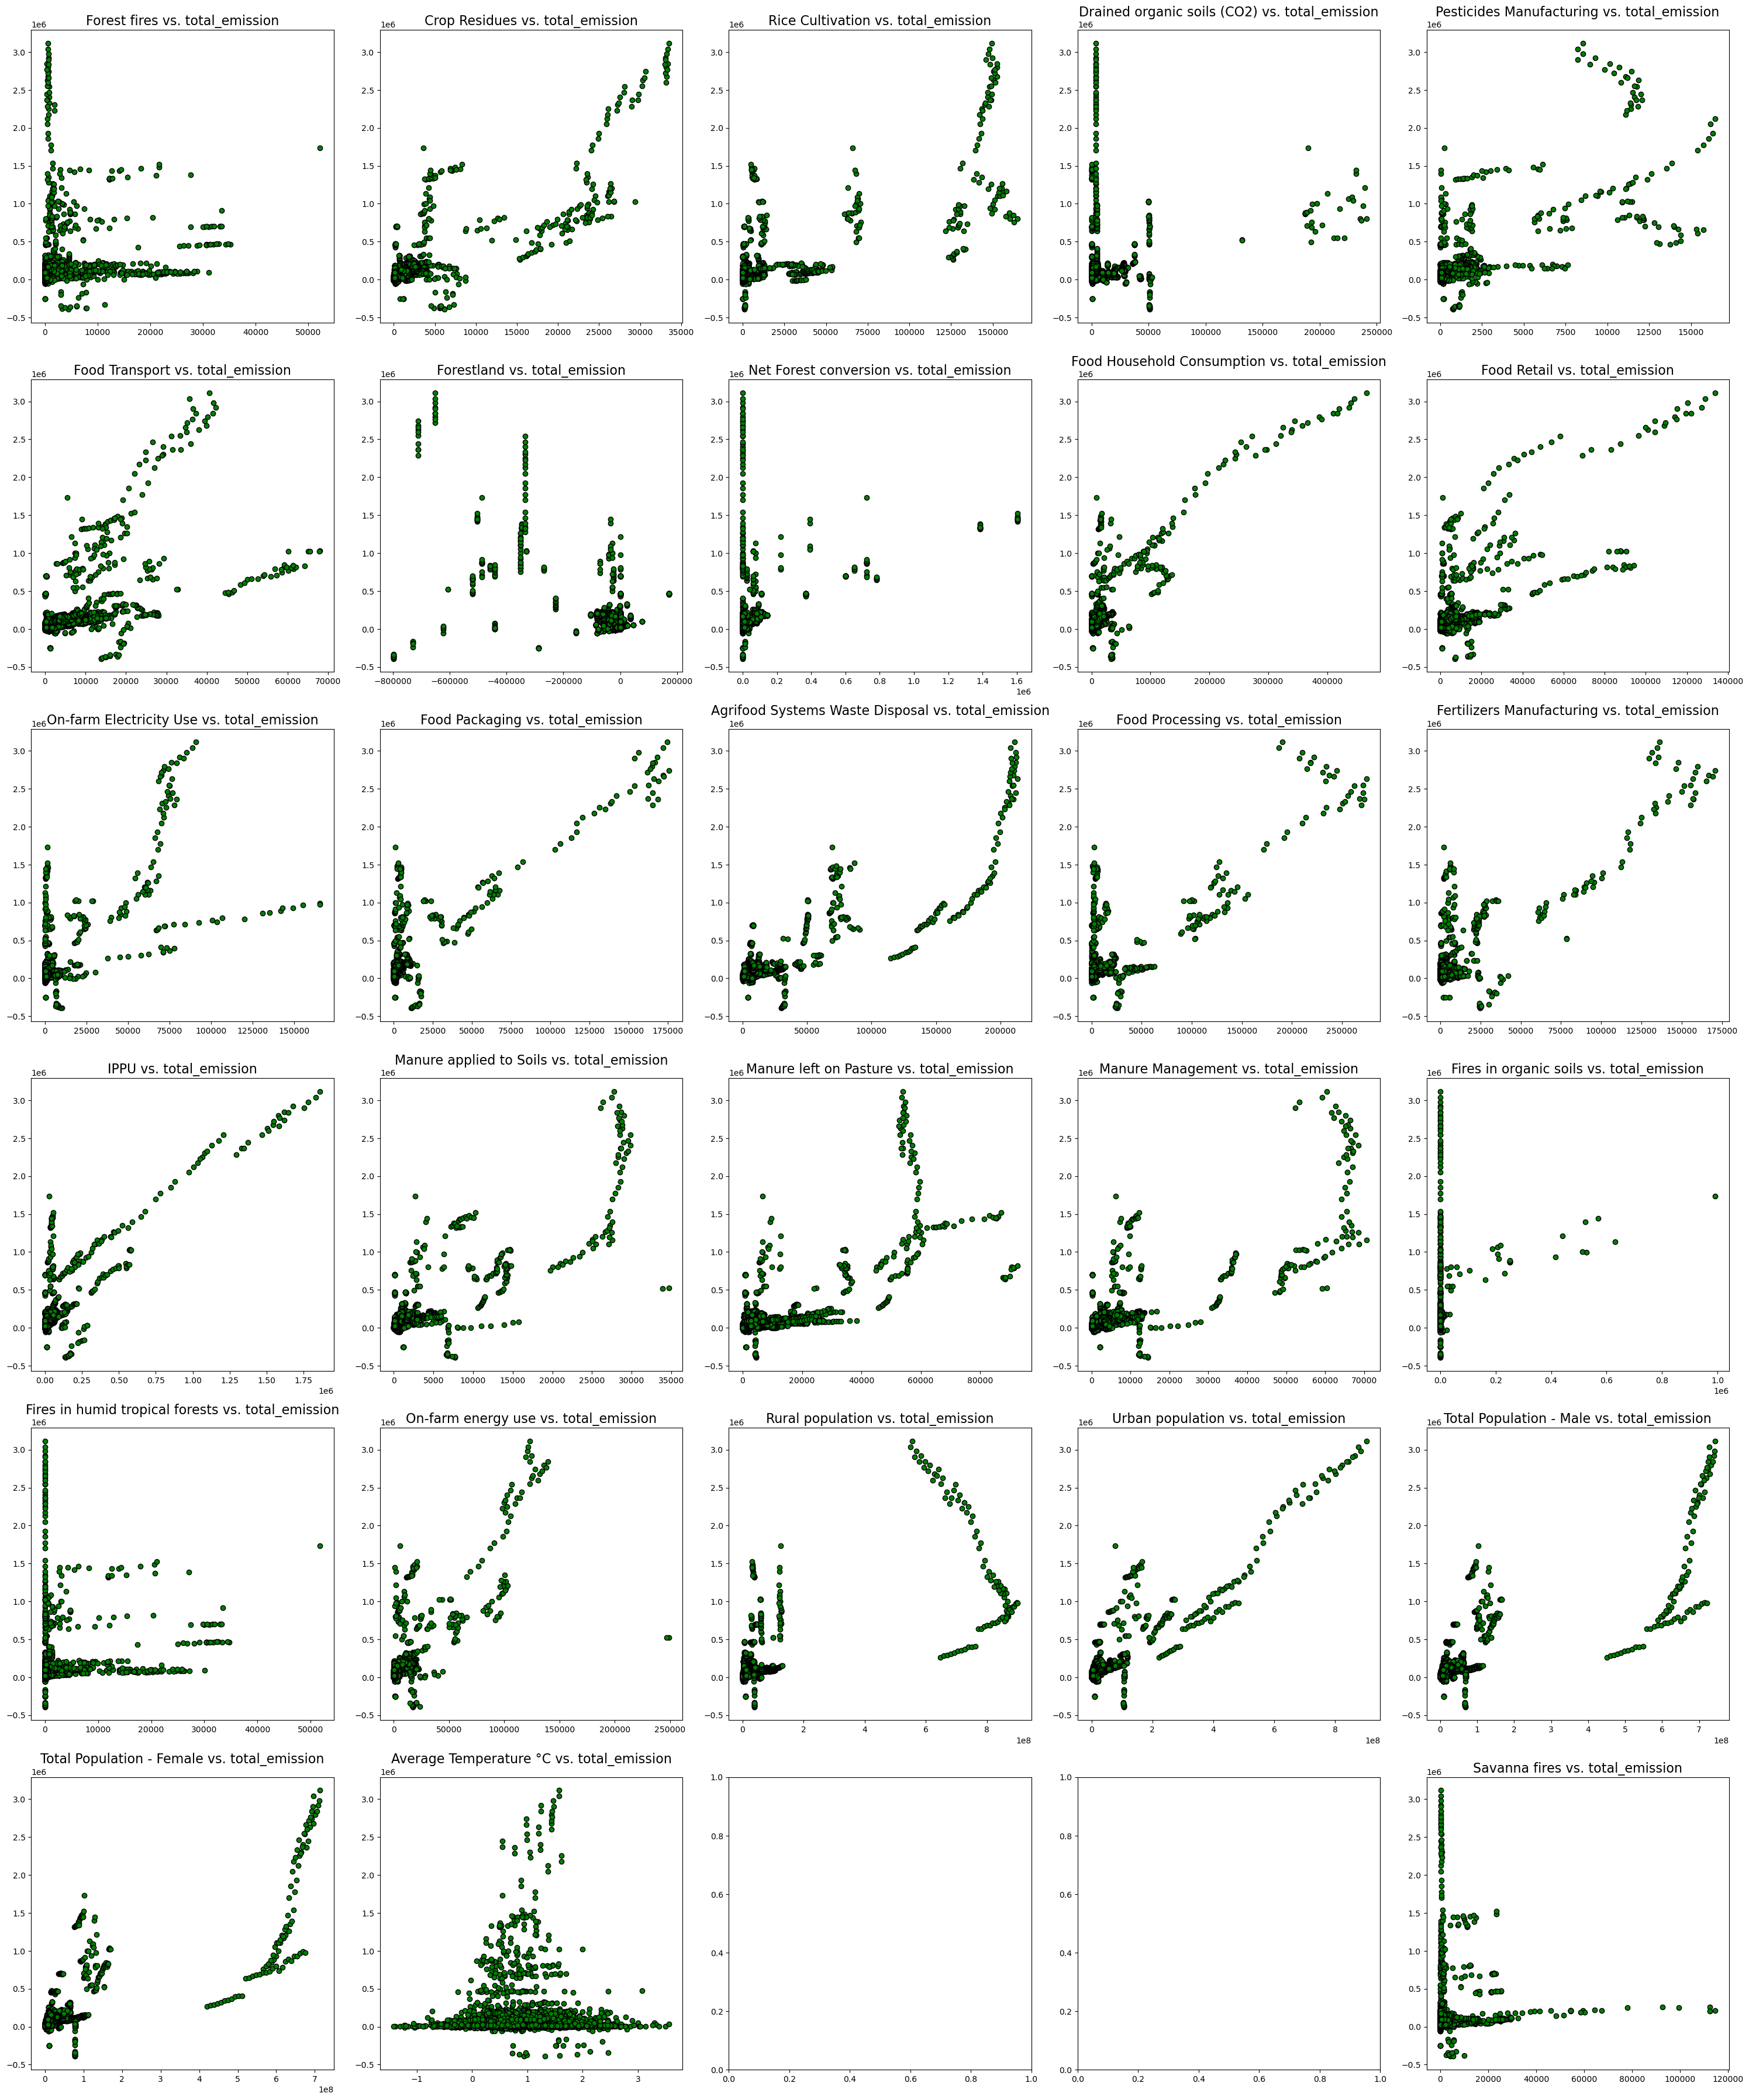

In [46]:
fig, axs = plt.subplots(6,5, figsize=(30,36),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()


df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Year', 'Area', 'total_emission',],axis = 1)

for index, column in enumerate(df_copy_2.columns):
    axs[index-1].set_title("{} vs. total_emission".format(column),fontsize=16)
    axs[index-1].scatter(x=df_copy_2[column],y=df_copy['total_emission'],color='green',edgecolor='k')
    
fig.tight_layout(pad=1)

There is no clear correlation between drained organic soils, forest fires, forest lands, net forest conversion, average temperature, savanna fires, fires in organic soil, fires in humid tropical forests and total emission

# 7. Modelling 

We are preprocessing the data to later understand the relationship between various variables related to CO2 emissions in the agri-food sector and the increase in temperatures, which will be our target for the Machine learning part of the project.

##### 7.1 Replacing missing values with regression techniques:
- Let's replace missing values with RandomForest prediction
- Let's encode categorical numbers
- Let's plot mutual information 

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

In [24]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  903


In [25]:
def regressor_imputer(df, feature, max_depth = 6):
    """ This function replace missing values with
        RanfomForestRegressor forecasting """

    df_filled = df.copy()

    if df_filled[feature].isna().any():
        missing_data = df_filled[df_filled[feature].isna()]
        non_missing_data = df_filled.dropna(subset=[feature])

        X_train = non_missing_data.drop(columns=[feature])
        y_train = non_missing_data[feature]

        imputer = SimpleImputer()
        X_train_imputed = imputer.fit_transform(X_train)
        X_missing = missing_data.drop(columns=[feature])
        X_missing_imputed = imputer.transform(X_missing)

        rf = RandomForestRegressor(max_depth = max_depth)
        rf.fit(X_train_imputed, y_train)

        y_missing_pred = rf.predict(X_missing_imputed)

        df_filled.loc[df_filled[feature].isna(), feature] = y_missing_pred

    return df_filled

In [26]:
num_features = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
cat_features = [col for col in df.columns if df[col].dtypes in ["object"]]
# let's create a list with onli missing values feature and the replace them with regression 
missing_values = df[num_features].isna().sum()
missing_list=missing_values[missing_values > 0].keys().tolist()

In [27]:
numeric_only = df[num_features ]
def replace_missing(df, missing_list):
    numeric_df = df.copy()
    for feature in tqdm(missing_list):
        numeric_df = regressor_imputer(numeric_df, feature)
    return numeric_df

numeric_df = replace_missing(numeric_only, missing_list)

  0%|          | 0/11 [00:00<?, ?it/s]

In [28]:
cat_df = df[cat_features].copy() 

label_encoder = LabelEncoder()
for column in cat_df.columns:
    cat_df.loc[:, column] = label_encoder.fit_transform(cat_df[column])

In [29]:
final_df = pd.concat([cat_df,numeric_df], axis =1)
X = final_df.drop(columns =["Average Temperature °C","per_capita_emission_kt"])
y =final_df["Average Temperature °C"]

##### 7.2 Random Forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [42]:
# Define the target and features
target = 'Average Temperature °C'
X = df.drop(columns=[target, 'Area'])  # Dropping non-numeric columns
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Now you can make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Assuming rf_predictions contains your model's predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions
})

# Display the evaluation metrics
print("Random Forest Regression")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R-squared:", rf_r2)

Random Forest Regression
MAE: 0.2729831557849041
MSE: 0.14364797872853274
R-squared: 0.5408434669254263


In [43]:
# Display the DataFrame
print(comparison_df)

        Actual  Predicted
5127  1.252750   1.177461
4988  0.333583   0.348709
918   1.433417   1.210309
1336  0.734417   0.714052
3623  0.830833   0.797625
3648  1.577167   1.246288
639   1.667750   1.197939
4901  0.121750   0.578665
1531  1.241583   0.826495
6042  0.666750   0.468343
2742  0.986333   0.660288
2246  1.080333   1.113988
3296  1.221000   1.517415
4878  0.700000   0.707766
2316  0.204917   0.476073
6738  0.710167   0.588850
5463  0.634917   0.568382
1820  0.501727   0.393789
285   1.510333   1.162436
1252 -0.036667   1.008539
6014 -0.034500   0.597333
2362  0.637583   0.799023
1876  1.041333   0.887093
5086  0.310500   0.656072
2735  0.883167   1.000736
1102  1.078000   1.175716
615   0.578750   0.331441
4140  0.847583   1.269896
2204  0.836750   0.949205
6944 -0.463333   0.324517
5492  1.562417   1.158704
6421  0.686083   0.664681
2762  1.401250   0.948028
5550  1.329333   1.017250
6417  0.517250   0.498587
1554  0.167500   0.263968
1532  0.602750   0.796810
156   0.3283

In [44]:
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
print(comparison_df)

        Actual  Predicted  Difference
5127  1.252750   1.177461    0.075289
4988  0.333583   0.348709   -0.015126
918   1.433417   1.210309    0.223108
1336  0.734417   0.714052    0.020365
3623  0.830833   0.797625    0.033209
3648  1.577167   1.246288    0.330879
639   1.667750   1.197939    0.469811
4901  0.121750   0.578665   -0.456915
1531  1.241583   0.826495    0.415088
6042  0.666750   0.468343    0.198407
2742  0.986333   0.660288    0.326045
2246  1.080333   1.113988   -0.033655
3296  1.221000   1.517415   -0.296415
4878  0.700000   0.707766   -0.007766
2316  0.204917   0.476073   -0.271157
6738  0.710167   0.588850    0.121317
5463  0.634917   0.568382    0.066534
1820  0.501727   0.393789    0.107938
285   1.510333   1.162436    0.347898
1252 -0.036667   1.008539   -1.045206
6014 -0.034500   0.597333   -0.631832
2362  0.637583   0.799023   -0.161439
1876  1.041333   0.887093    0.154241
5086  0.310500   0.656072   -0.345572
2735  0.883167   1.000736   -0.117569
1102  1.0780

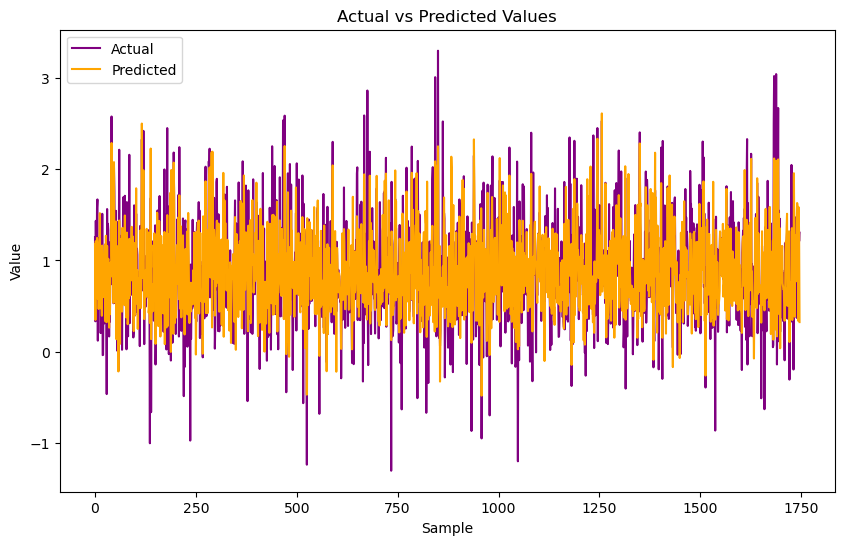

In [45]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', color='purple')
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='orange')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

The MAE of 0.2592 is quite low, which is encouraging for the model's accuracy, although its significance can vary based on the scale of your data. Meanwhile, the R-squared value of 0.5913 reveals that there is potential for enhancement, as it shows the model accounts for only approximately 59% of the data's variance.

##### 7.3 

In [ ]:
df_model = pd.get_dummies(df)

# Assign X and y variables
y = df_model['Average Temperature °C']
X = df_model.drop(columns=y.name, axis=1)

# Train test split with standrd scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling X variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]


In [ ]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_continent)

In [ ]:
px.scatter(df, df["Average Temperature °C"],
           df["total_emission"], 
           size= "pop_tot", 
           title = "<b>CO2 Emission & Temperature - population", 
           template="plotly_dark", 
           color ="continent")

In [ ]:
correlation = df.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()


,total_emission,Average Temperature °C,pop_tot
total_emission,1.000000,0.104648,0.751023
Average Temperature °C,0.104648,1.000000,-0.321621
pop_tot,0.751023,-0.321621,1.000000
